**Data Wrangeling(1) - Data Collection and Exploration**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/SalesKaggle3.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

# Display summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

First few rows of the dataset:


,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99



Summary statistics:


,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000



Missing values in each column:


,0
Order,0
File_Type,0
SKU_number,0
SoldFlag,122921
SoldCount,122921
MarketingType,0
ReleaseNumber,0
New_Release_Flag,0
StrengthFactor,0
PriceReg,0


**`Data Wrangeling(2) - Data Preparation and Transformation`**

In [ ]:
# Drop columns with all missing values (if any)
df_cleaned = df.dropna(how='all', axis=1)

# Fill missing values (we can customize the filling strategy based on column type)
# For numeric columns, we might fill with the mean or median
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# For categorical columns, we might fill with the mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

# Convert any date columns to datetime format
# Assuming there's a column named 'date' that represents dates
if 'date' in df_cleaned.columns:
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Display the cleaned data
print("\nCleaned Data:")
display(df_cleaned.head())

# Save the cleaned data for further analysis
cleaned_file_path = '/content/cleaned_sales_inventory_data.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data has been saved to {cleaned_file_path}")



Cleaned Data:


,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015.0,8.0,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005.0,39.0,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013.0,34.0,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006.0,20.0,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010.0,28.0,4.00,23.99



Cleaned data has been saved to /content/cleaned_sales_inventory_data.csv


**Step 1: Importing (Cleaned) Libraries and Loading the Data**

In [ ]:
import pandas as pd

# Load the dataset from your specified file path
file_path = '/content/cleaned_sales_inventory_data.csv'
df = pd.read_csv(file_path)

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.head())  # Show the first few rows to verify the data


Initial DataFrame:
   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99       2015.0   
1              7                 1       1016014.0     24.81       2005.0   
2              0                 0        340464.0     46.00       2013.0   
3              4                 1        334011.0    100.00       2006.0   
4              2                 1       1287938.0    121.95       2010.0   

   ItemCount  LowUserPrice  LowNetPrice  
0        8.0         28.97        31.84  
1      

**Step 2: ABC Analysis - Filtering and Calculating the Total Value per SKU for Historical Data**

In [ ]:
# Create a separate DataFrame for Historical data
historical_df = df[df['File_Type'] == 'Historical'].copy()

# Calculate the TotalValue as PriceReg * SoldCount for the Historical data
historical_df['TotalValue'] = historical_df['PriceReg'] * historical_df['SoldCount']
print("\nHistorical DataFrame after calculating TotalValue:")
print(historical_df.head())  # Show the first few rows to verify the calculation



Historical DataFrame after calculating TotalValue:
   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99       2015.0   
1              7                 1       1016014.0     24.81       2005.0   
2              0                 0        340464.0     46.00       2013.0   
3              4                 1        334011.0    100.00       2006.0   
4              2                 1       1287938.0    121.95       2010.0   

   ItemCount  LowUserPrice  LowNetPrice  TotalValue  
0   

**Step 3: Sorting the Historical SKUs by Total Value**

In [ ]:
# Sort the Historical DataFrame by TotalValue in descending order
historical_df_sorted = historical_df.sort_values(by='TotalValue', ascending=False)
print("\nHistorical DataFrame after sorting by TotalValue:")
print(historical_df_sorted.head())  # Show the first few rows of the sorted DataFrame



Historical DataFrame after sorting by TotalValue:
       Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
5727    5956  Historical      416609       1.0       35.0             D   
28067  28682  Historical      614709       1.0       12.0             D   
16465  16865  Historical      613864       1.0       69.0             D   
9140    9412  Historical      416485       1.0       16.0             D   
20128  20597  Historical      610384       1.0       18.0             D   

       ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
5727              13                 1         11377.0    346.25       2012.0   
28067              6                 1         98739.0    599.00       2012.0   
16465              0                 0          7237.0     80.75       2012.0   
9140               1                 0         13228.0    346.25       2012.0   
20128             14                 1          6786.0    269.25       2013.0   

       Item

**Step 4: Calculating the Cumulative Distribution for Historical Data**

In [ ]:
# Calculate the cumulative value and percentage for the Historical data
historical_df_sorted['CumulativeValue'] = historical_df_sorted['TotalValue'].cumsum()
historical_df_sorted['CumulativePercentage'] = (historical_df_sorted['CumulativeValue'] / historical_df_sorted['TotalValue'].sum()) * 100
print("\nHistorical DataFrame with Cumulative Value and Percentage:")
print(historical_df_sorted.head())  # Show the first few rows to verify the cumulative calculations



Historical DataFrame with Cumulative Value and Percentage:
       Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
5727    5956  Historical      416609       1.0       35.0             D   
28067  28682  Historical      614709       1.0       12.0             D   
16465  16865  Historical      613864       1.0       69.0             D   
9140    9412  Historical      416485       1.0       16.0             D   
20128  20597  Historical      610384       1.0       18.0             D   

       ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
5727              13                 1         11377.0    346.25       2012.0   
28067              6                 1         98739.0    599.00       2012.0   
16465              0                 0          7237.0     80.75       2012.0   
9140               1                 0         13228.0    346.25       2012.0   
20128             14                 1          6786.0    269.25       2013.0   

  

**Step 5: Classifying the Historical SKUs into A, B, and C Categories**
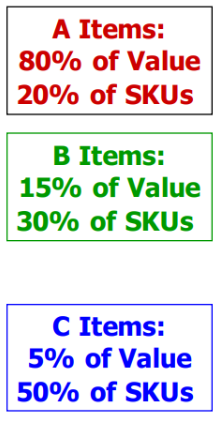

In [ ]:
# Function to classify based on the adjusted CumulativePercentage
def classify_abc(percentage):
    if percentage <= 80:
        return 'A'
    elif percentage <= 95:  # 80% + 15% = 95%
        return 'B'
    else:
        return 'C'

# Apply the function to classify each SKU in the Historical data
historical_df_sorted['ABC_Category'] = historical_df_sorted['CumulativePercentage'].apply(classify_abc)
print("\nHistorical DataFrame with ABC Classification:")
print(historical_df_sorted.head())  # Show the first few rows to verify the classification



Historical DataFrame with ABC Classification:
       Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
5727    5956  Historical      416609       1.0       35.0             D   
28067  28682  Historical      614709       1.0       12.0             D   
16465  16865  Historical      613864       1.0       69.0             D   
9140    9412  Historical      416485       1.0       16.0             D   
20128  20597  Historical      610384       1.0       18.0             D   

       ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
5727              13                 1         11377.0    346.25       2012.0   
28067              6                 1         98739.0    599.00       2012.0   
16465              0                 0          7237.0     80.75       2012.0   
9140               1                 0         13228.0    346.25       2012.0   
20128             14                 1          6786.0    269.25       2013.0   

       ItemCoun

**Step 6: Merging the ABC Classification Back to the Original DataFrame**

In [ ]:
# Merge the ABC classification back into the original DataFrame
df = df.merge(historical_df_sorted[['SKU_number', 'ABC_Category']], on='SKU_number', how='left')

# Rows not in the Historical data will have NaN in the ABC_Category column, which we can fill as 'Not Classified'
df['ABC_Category'] = df['ABC_Category'].fillna('Not Classified')

print("\nFinal DataFrame with ABC Classification for Historical File_Type:")
print(df.head())  # Show the first few rows to verify the final DataFrame



Final DataFrame with ABC Classification for Historical File_Type:
   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99       2015.0   
1              7                 1       1016014.0     24.81       2005.0   
2              0                 0        340464.0     46.00       2013.0   
3              4                 1        334011.0    100.00       2006.0   
4              2                 1       1287938.0    121.95       2010.0   

   ItemCount  LowUserPrice  LowNetPrice ABC

**Step 7: Save the Final DataFrame with ABC Analysis to a CSV File**

In [ ]:
# Define the file path for saving the CSV file
output_file_path = '/content/cleaned_sales_inventory_data_with_ABC.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"\nDataFrame has been saved to {output_file_path}")



DataFrame has been saved to /content/cleaned_sales_inventory_data_with_ABC.csv


**Data Visualization:**

**1) Use Python - matplotlib&seaborn**

**2) Use Power BI - interactive dashboard**

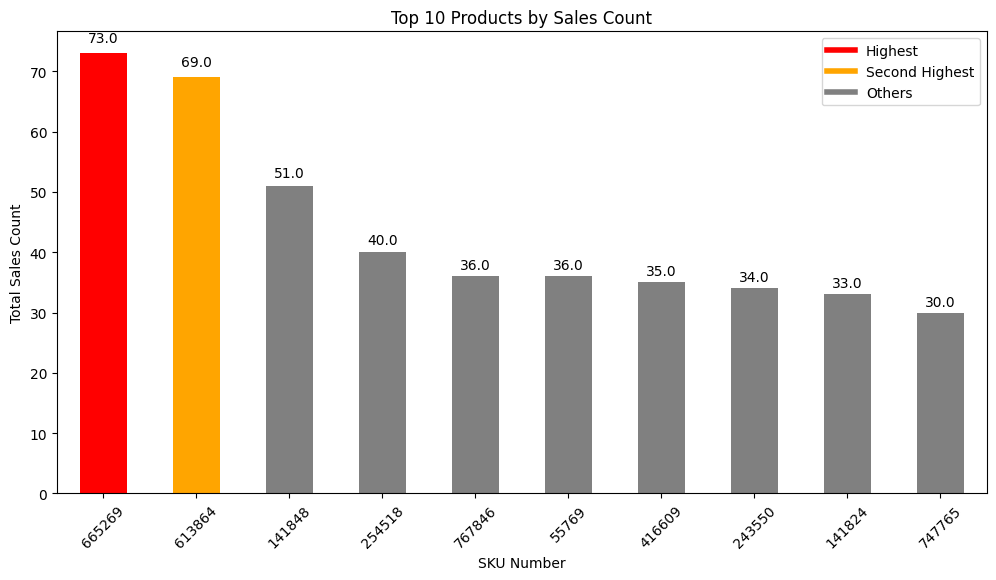

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from your specified file path
file_path = '/content/cleaned_sales_inventory_data_with_ABC.csv'
df = pd.read_csv(file_path)

# Group by SKU_number and sum the SoldCount, then sort to get the top 10 products
top_products = df.groupby('SKU_number')['SoldCount'].sum().sort_values(ascending=False).head(10)

# Set colors for the bars
colors = ['red'] + ['orange'] + ['grey'] * (len(top_products) - 2)  # Highlight the top 1 as red, top 2 as orange, and others as grey

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color=colors)
plt.title('Top 10 Products by Sales Count')
plt.xlabel('SKU Number')
plt.ylabel('Total Sales Count')
plt.xticks(rotation=45)  # Rotate SKU numbers for better readability

# Annotate the top 1 and top 2 bars
for i, v in enumerate(top_products):
    plt.text(i, v + 0.02 * v, f'{v}', ha='center', va='bottom', fontsize=10, color='black')

# Add legend for clarity
plt.legend(handles=[plt.Line2D([0], [0], color='red', lw=4, label='Highest'),
                    plt.Line2D([0], [0], color='orange', lw=4, label='Second Highest'),
                    plt.Line2D([0], [0], color='grey', lw=4, label='Others')])

plt.show()


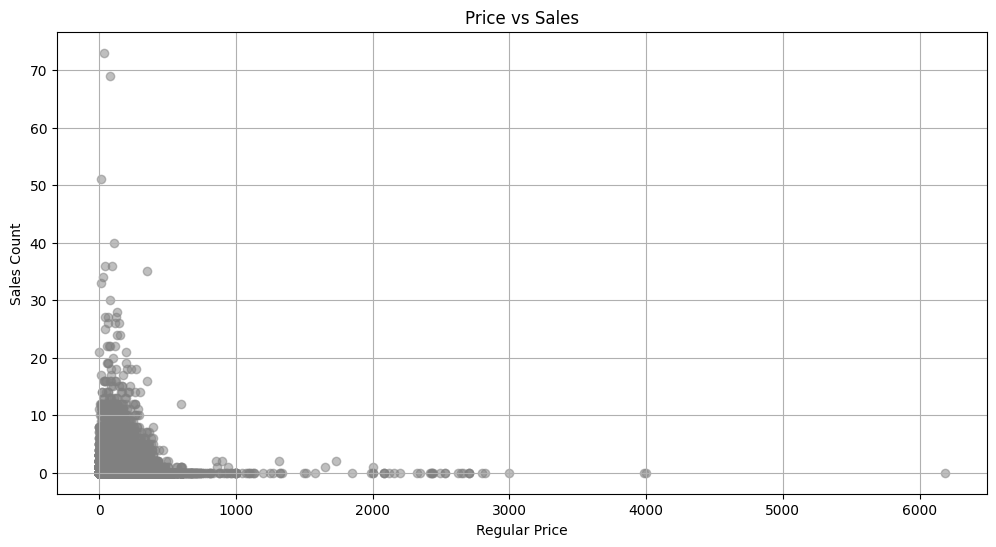

In [ ]:
# Price vs. Sales (Scatter Plot)
plt.figure(figsize=(12, 6))
plt.scatter(df['PriceReg'], df['SoldCount'], alpha=0.5, color='grey')
plt.title('Price vs Sales')
plt.xlabel('Regular Price')
plt.ylabel('Sales Count')
plt.grid(True)  # Add grid for better visualization
plt.show()


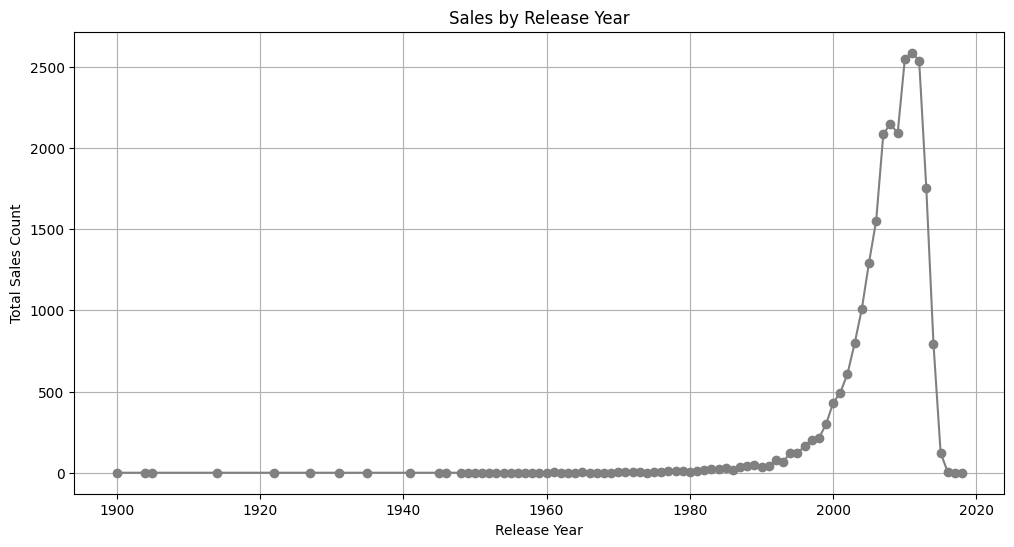

In [ ]:
# Sales by Release Year (Line Chart)
plt.figure(figsize=(12, 6))
sales_by_year = df.groupby('ReleaseYear')['SoldCount'].sum()
sales_by_year.plot(kind='line', marker='o', color='grey')
plt.title('Sales by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Sales Count')
plt.grid(True)  # Add grid for better visualization
plt.show()

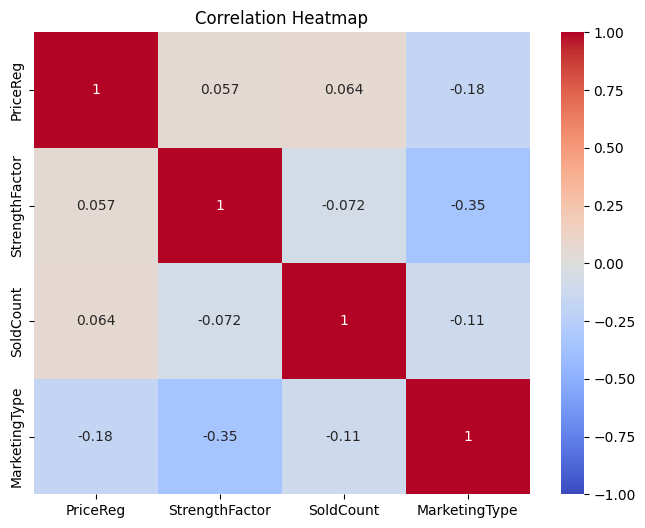

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset from your specified file path
file_path = '/content/cleaned_sales_inventory_data_with_ABC.csv'
df = pd.read_csv(file_path)

# Convert 'MarketingType' from categorical to numeric using Label Encoding
label_encoder = LabelEncoder()
df['MarketingType'] = label_encoder.fit_transform(df['MarketingType'])

# Select the columns of interest
selected_columns = ['PriceReg', 'StrengthFactor', 'SoldCount', 'MarketingType']

# Ensure all columns are numeric
df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()


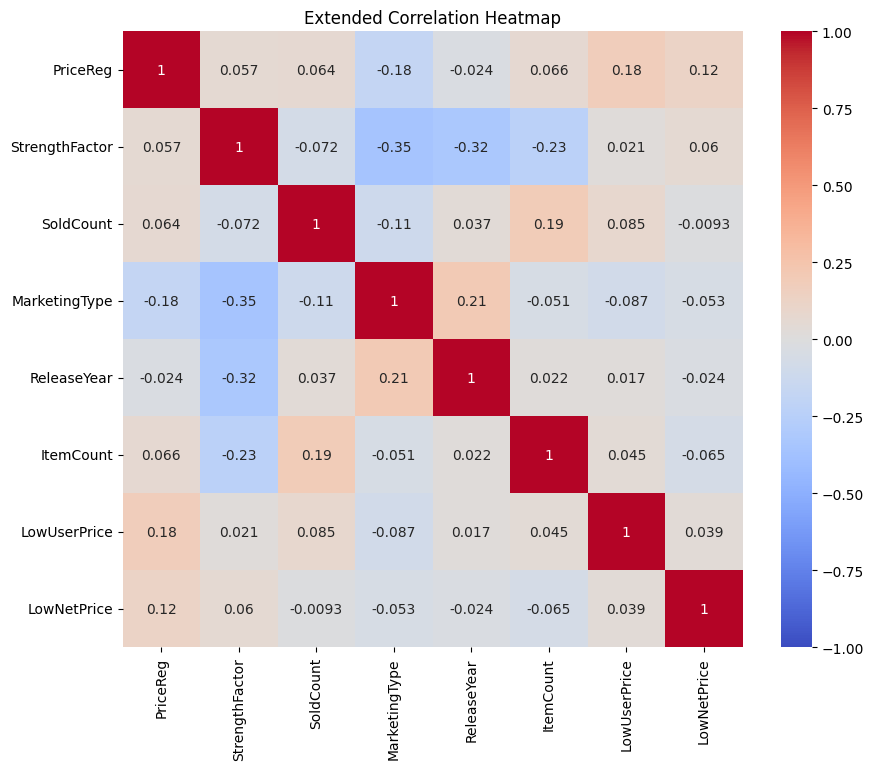

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/cleaned_sales_inventory_data_with_ABC.csv'
df = pd.read_csv(file_path)

# Convert 'MarketingType' and any other categorical variables to numeric
label_encoder = LabelEncoder()
df['MarketingType'] = label_encoder.fit_transform(df['MarketingType'])

# Select additional columns of interest
selected_columns = ['PriceReg', 'StrengthFactor', 'SoldCount', 'MarketingType', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

# Ensure all selected columns are numeric
df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Calculate the correlation matrix for the extended set of variables
correlation_matrix = df[selected_columns].corr()

# Plot the extended heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Extended Correlation Heatmap')
plt.show()
